In [1]:
from utils.utils import *
from utils.Algorithms import *
from utils.GraphCreation import *
np.random.seed(0)

# Reste à faire le M layers (à discuter)

[]

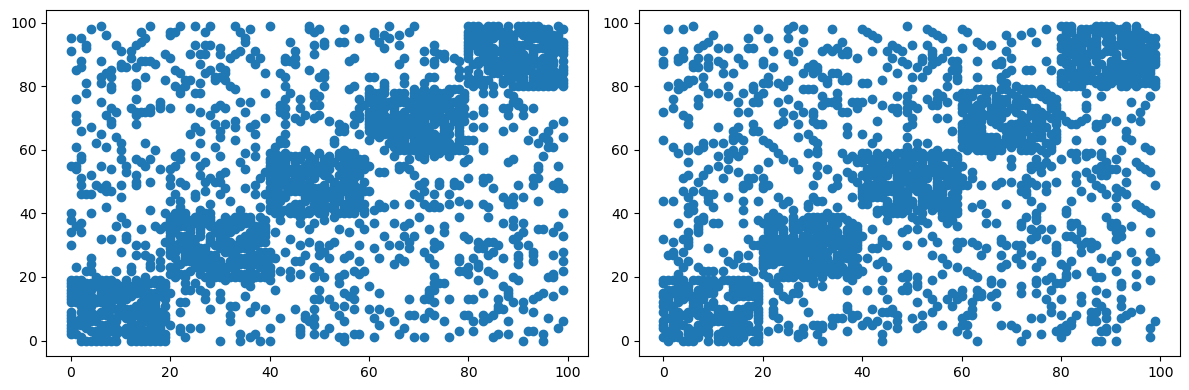

In [2]:
n = 100
M = 2
k = 5

prob = np.full((k,M),0.6)
prob_prime = np.full((k,k,M),0.1)
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime)

fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()

In [7]:
def twoLayerSC_SR(W,k):
  lam = 1
  mu = 1/lam
  n = W.shape[1]
  D = computeDegreeMatrix(W[:, :, 0])
  L = np.linalg.inv(D)@(D-W[:, :, 0])
  eigenvalues,eigenvectors = np.linalg.eig(L)
  indexes = np.argsort(eigenvalues)[0:k]
  U = eigenvectors[:,indexes]
  U_prime = np.zeros(U.shape)
  D_2 = computeDegreeMatrix(W[:, :, 1])
  L_sym_2 = np.linalg.inv(np.sqrt(D_2))@(D_2-W[: ,:, 1])@np.linalg.inv(np.sqrt(D_2))
  for i in range(1,k):
    f = mu*np.linalg.inv((L_sym_2 + mu*np.identity(n)))@U[:,i]
    U_prime[:,i] = f
  return k_means_cluster(U_prime,k)


In [8]:
print(twoLayerSC_SR(matrix,5))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
def spectral_clustering_MLayers(W,k):
  n,_,M = W.shape
  lam = 1
  mu = 1/lam
  D = computeDegreeMatrix(W[:, :, 0])
  L = np.linalg.inv(D)@(D-W[:, :, 0])
  eigenvalues,eigenvectors = np.linalg.eig(L)
  indexes = np.argsort(eigenvalues)[0:k]
  U = eigenvectors[:,indexes]

  for i in range(M):
    U_prime = np.zeros(U.shape)
    D_i = computeDegreeMatrix(W[:, :, i])
    L_sym = np.linalg.inv(np.sqrt(D_i))@(D_i-W[:,:,1])@np.linalg.inv(np.sqrt(D_i))
    for i in range(1,k):
      f = mu*np.linalg.inv((L_sym + mu*np.identity(n)))@U[:,i]
      U_prime[:,i] = f
    U = U_prime.copy()

  return k_means_cluster(U_prime,k)